In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt
from download import download

np.set_printoptions(suppress=True)

In [2]:
OBS = 100 # observation period
EXT = 20 # extrapolation period
EPOCH = 1000 # number of simulations

In [3]:
ticker = input("Ticker: ")
apikey = open("apikey", "r").readline()
raw = download(ticker, apikey)
print(raw)

Ticker: SPLG
            date   adjClose
0     2005-11-15  10.151241
1     2005-11-16  10.085182
2     2005-11-17  10.085182
3     2005-11-18  10.219082
4     2005-11-21  10.260143
...          ...        ...
4464  2023-08-14  52.710000
4465  2023-08-15  52.100000
4466  2023-08-16  51.680000
4467  2023-08-17  51.310000
4468  2023-08-18  51.340000

[4469 rows x 2 columns]


SPLG P&L
                 0
count  4468.000000
mean      0.000433
std       0.011842
min      -0.116761
25%      -0.003910
50%       0.000155
75%       0.005495
max       0.095256


[Text(0.5, 0, 'SPLG P&L'), Text(0, 0.5, 'Frequency')]

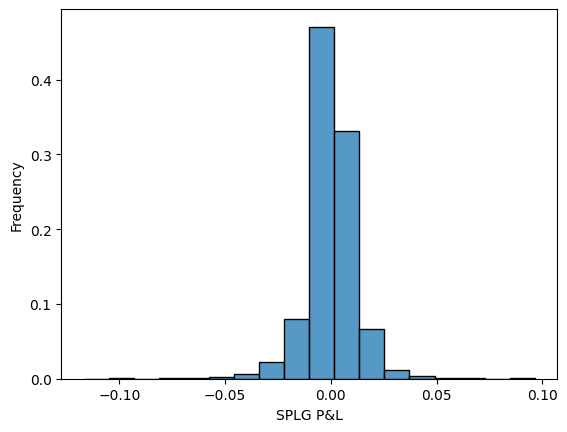

In [4]:
returns = []
for t in range(1, raw.shape[0]):
    returns.append((raw["adjClose"][t] - raw["adjClose"][t-1]) / raw["adjClose"][t-1])

returns = np.array(returns)
raw = raw.iloc[1:]

print("{} P&L" .format(ticker))
print(pd.DataFrame(returns).describe())

ax = sns.histplot(data=returns, binwidth=np.std(returns), stat="probability")
ax.set(xlabel="{} P&L" .format(ticker), ylabel="Frequency")

In [5]:
valuation_series = []
recent_simulations = []

In [6]:
for T in range(OBS-1, raw.shape[0]):
    s0 = raw["adjClose"][T] # current value
    mu = returns[T+1-OBS:T+1].mean() # mean daily return
    sigma = np.std(returns[T+1-OBS:T+1]) # variability in daily returns
    drift = mu + 0.5 * sigma**2 # drift of random walk
    
    brownian = np.random.normal(0, 1, (EPOCH, EXT)) # brownian shock values
    brownian = np.cumsum(brownian, axis=1)
    
    t = np.arange(1, EXT+1) # extrapolation time
    path = s0 * np.exp(drift * t + sigma * brownian) # simulated paths
    
    # P(s_t > s0 | t E {1, 2, 3, ... , EXT}) (valuation score)
    score = float(sum(path.flatten() > s0)) / (EPOCH * EXT)
    valuation_series.append(score)
    
    if T == raw.shape[0] - 1: # save recent simulations
        recent_simulations = np.insert(path, 0, s0, axis=1)
    
    print("T={} @ {} VAL={}" .format(T, ticker, score))

T=99 @ SPLG VAL=0.61655
T=100 @ SPLG VAL=0.6409
T=101 @ SPLG VAL=0.64945
T=102 @ SPLG VAL=0.6027
T=103 @ SPLG VAL=0.5975
T=104 @ SPLG VAL=0.62175
T=105 @ SPLG VAL=0.60905
T=106 @ SPLG VAL=0.6295
T=107 @ SPLG VAL=0.6173
T=108 @ SPLG VAL=0.6091
T=109 @ SPLG VAL=0.6028
T=110 @ SPLG VAL=0.60035
T=111 @ SPLG VAL=0.6207
T=112 @ SPLG VAL=0.59205
T=113 @ SPLG VAL=0.6074
T=114 @ SPLG VAL=0.6305
T=115 @ SPLG VAL=0.6224
T=116 @ SPLG VAL=0.62145
T=117 @ SPLG VAL=0.6377
T=118 @ SPLG VAL=0.65385
T=119 @ SPLG VAL=0.6003
T=120 @ SPLG VAL=0.6059
T=121 @ SPLG VAL=0.60245
T=122 @ SPLG VAL=0.59725
T=123 @ SPLG VAL=0.5981
T=124 @ SPLG VAL=0.59265
T=125 @ SPLG VAL=0.6061
T=126 @ SPLG VAL=0.61495
T=127 @ SPLG VAL=0.62455
T=128 @ SPLG VAL=0.6223
T=129 @ SPLG VAL=0.49905
T=130 @ SPLG VAL=0.5276
T=131 @ SPLG VAL=0.5076
T=132 @ SPLG VAL=0.5206
T=133 @ SPLG VAL=0.52935
T=134 @ SPLG VAL=0.51855
T=135 @ SPLG VAL=0.5167
T=136 @ SPLG VAL=0.48085
T=137 @ SPLG VAL=0.4656
T=138 @ SPLG VAL=0.47915
T=139 @ SPLG VAL=0.4804

T=458 @ SPLG VAL=0.53315
T=459 @ SPLG VAL=0.50805
T=460 @ SPLG VAL=0.55745
T=461 @ SPLG VAL=0.54425
T=462 @ SPLG VAL=0.5352
T=463 @ SPLG VAL=0.55445
T=464 @ SPLG VAL=0.56685
T=465 @ SPLG VAL=0.5504
T=466 @ SPLG VAL=0.53555
T=467 @ SPLG VAL=0.5381
T=468 @ SPLG VAL=0.5237
T=469 @ SPLG VAL=0.5504
T=470 @ SPLG VAL=0.52325
T=471 @ SPLG VAL=0.53195
T=472 @ SPLG VAL=0.52405
T=473 @ SPLG VAL=0.56495
T=474 @ SPLG VAL=0.5734
T=475 @ SPLG VAL=0.5722
T=476 @ SPLG VAL=0.55445
T=477 @ SPLG VAL=0.5295
T=478 @ SPLG VAL=0.5564
T=479 @ SPLG VAL=0.54675
T=480 @ SPLG VAL=0.5573
T=481 @ SPLG VAL=0.564
T=482 @ SPLG VAL=0.5624
T=483 @ SPLG VAL=0.5007
T=484 @ SPLG VAL=0.4841
T=485 @ SPLG VAL=0.5042
T=486 @ SPLG VAL=0.4966
T=487 @ SPLG VAL=0.50235
T=488 @ SPLG VAL=0.5132
T=489 @ SPLG VAL=0.5606
T=490 @ SPLG VAL=0.55955
T=491 @ SPLG VAL=0.54285
T=492 @ SPLG VAL=0.5354
T=493 @ SPLG VAL=0.51945
T=494 @ SPLG VAL=0.54035
T=495 @ SPLG VAL=0.51485
T=496 @ SPLG VAL=0.47185
T=497 @ SPLG VAL=0.4667
T=498 @ SPLG VAL=0.47

T=853 @ SPLG VAL=0.5302
T=854 @ SPLG VAL=0.5204
T=855 @ SPLG VAL=0.5151
T=856 @ SPLG VAL=0.5609
T=857 @ SPLG VAL=0.55515
T=858 @ SPLG VAL=0.5877
T=859 @ SPLG VAL=0.56175
T=860 @ SPLG VAL=0.5339
T=861 @ SPLG VAL=0.51075
T=862 @ SPLG VAL=0.5081
T=863 @ SPLG VAL=0.5377
T=864 @ SPLG VAL=0.5756
T=865 @ SPLG VAL=0.5462
T=866 @ SPLG VAL=0.5423
T=867 @ SPLG VAL=0.55115
T=868 @ SPLG VAL=0.55165
T=869 @ SPLG VAL=0.53
T=870 @ SPLG VAL=0.5474
T=871 @ SPLG VAL=0.5371
T=872 @ SPLG VAL=0.54655
T=873 @ SPLG VAL=0.56625
T=874 @ SPLG VAL=0.5766
T=875 @ SPLG VAL=0.5426
T=876 @ SPLG VAL=0.52495
T=877 @ SPLG VAL=0.56165
T=878 @ SPLG VAL=0.51655
T=879 @ SPLG VAL=0.58015
T=880 @ SPLG VAL=0.5757
T=881 @ SPLG VAL=0.5508
T=882 @ SPLG VAL=0.55875
T=883 @ SPLG VAL=0.54915
T=884 @ SPLG VAL=0.5717
T=885 @ SPLG VAL=0.54665
T=886 @ SPLG VAL=0.5282
T=887 @ SPLG VAL=0.5492
T=888 @ SPLG VAL=0.53425
T=889 @ SPLG VAL=0.55705
T=890 @ SPLG VAL=0.52505
T=891 @ SPLG VAL=0.56415
T=892 @ SPLG VAL=0.59865
T=893 @ SPLG VAL=0.5706

T=1237 @ SPLG VAL=0.60835
T=1238 @ SPLG VAL=0.58135
T=1239 @ SPLG VAL=0.61395
T=1240 @ SPLG VAL=0.5954
T=1241 @ SPLG VAL=0.60875
T=1242 @ SPLG VAL=0.59305
T=1243 @ SPLG VAL=0.6441
T=1244 @ SPLG VAL=0.6369
T=1245 @ SPLG VAL=0.64825
T=1246 @ SPLG VAL=0.62005
T=1247 @ SPLG VAL=0.6427
T=1248 @ SPLG VAL=0.6193
T=1249 @ SPLG VAL=0.63325
T=1250 @ SPLG VAL=0.61485
T=1251 @ SPLG VAL=0.62505
T=1252 @ SPLG VAL=0.627
T=1253 @ SPLG VAL=0.62235
T=1254 @ SPLG VAL=0.62235
T=1255 @ SPLG VAL=0.6238
T=1256 @ SPLG VAL=0.6203
T=1257 @ SPLG VAL=0.64665
T=1258 @ SPLG VAL=0.6343
T=1259 @ SPLG VAL=0.6361
T=1260 @ SPLG VAL=0.69095
T=1261 @ SPLG VAL=0.68605
T=1262 @ SPLG VAL=0.682
T=1263 @ SPLG VAL=0.67965
T=1264 @ SPLG VAL=0.6869
T=1265 @ SPLG VAL=0.6702
T=1266 @ SPLG VAL=0.64085
T=1267 @ SPLG VAL=0.64245
T=1268 @ SPLG VAL=0.66315
T=1269 @ SPLG VAL=0.61725
T=1270 @ SPLG VAL=0.6727
T=1271 @ SPLG VAL=0.6644
T=1272 @ SPLG VAL=0.70115
T=1273 @ SPLG VAL=0.6608
T=1274 @ SPLG VAL=0.66915
T=1275 @ SPLG VAL=0.69395
T=12

T=1609 @ SPLG VAL=0.64385
T=1610 @ SPLG VAL=0.6275
T=1611 @ SPLG VAL=0.6453
T=1612 @ SPLG VAL=0.7072
T=1613 @ SPLG VAL=0.70005
T=1614 @ SPLG VAL=0.73175
T=1615 @ SPLG VAL=0.7521
T=1616 @ SPLG VAL=0.7403
T=1617 @ SPLG VAL=0.74235
T=1618 @ SPLG VAL=0.72405
T=1619 @ SPLG VAL=0.7072
T=1620 @ SPLG VAL=0.70055
T=1621 @ SPLG VAL=0.69235
T=1622 @ SPLG VAL=0.6961
T=1623 @ SPLG VAL=0.6687
T=1624 @ SPLG VAL=0.71335
T=1625 @ SPLG VAL=0.7089
T=1626 @ SPLG VAL=0.7054
T=1627 @ SPLG VAL=0.64865
T=1628 @ SPLG VAL=0.70315
T=1629 @ SPLG VAL=0.69295
T=1630 @ SPLG VAL=0.70675
T=1631 @ SPLG VAL=0.7037
T=1632 @ SPLG VAL=0.7094
T=1633 @ SPLG VAL=0.66545
T=1634 @ SPLG VAL=0.6651
T=1635 @ SPLG VAL=0.64685
T=1636 @ SPLG VAL=0.6243
T=1637 @ SPLG VAL=0.5609
T=1638 @ SPLG VAL=0.5555
T=1639 @ SPLG VAL=0.60365
T=1640 @ SPLG VAL=0.59175
T=1641 @ SPLG VAL=0.59605
T=1642 @ SPLG VAL=0.58005
T=1643 @ SPLG VAL=0.6084
T=1644 @ SPLG VAL=0.5882
T=1645 @ SPLG VAL=0.5553
T=1646 @ SPLG VAL=0.51455
T=1647 @ SPLG VAL=0.48945
T=164

T=1932 @ SPLG VAL=0.68555
T=1933 @ SPLG VAL=0.6797
T=1934 @ SPLG VAL=0.66475
T=1935 @ SPLG VAL=0.66895
T=1936 @ SPLG VAL=0.6754
T=1937 @ SPLG VAL=0.6331
T=1938 @ SPLG VAL=0.6814
T=1939 @ SPLG VAL=0.66955
T=1940 @ SPLG VAL=0.6522
T=1941 @ SPLG VAL=0.6479
T=1942 @ SPLG VAL=0.64835
T=1943 @ SPLG VAL=0.65795
T=1944 @ SPLG VAL=0.6569
T=1945 @ SPLG VAL=0.6351
T=1946 @ SPLG VAL=0.64955
T=1947 @ SPLG VAL=0.65775
T=1948 @ SPLG VAL=0.6212
T=1949 @ SPLG VAL=0.62145
T=1950 @ SPLG VAL=0.6039
T=1951 @ SPLG VAL=0.59015
T=1952 @ SPLG VAL=0.61105
T=1953 @ SPLG VAL=0.6093
T=1954 @ SPLG VAL=0.6241
T=1955 @ SPLG VAL=0.6335
T=1956 @ SPLG VAL=0.58705
T=1957 @ SPLG VAL=0.6113
T=1958 @ SPLG VAL=0.58395
T=1959 @ SPLG VAL=0.582
T=1960 @ SPLG VAL=0.5747
T=1961 @ SPLG VAL=0.5762
T=1962 @ SPLG VAL=0.61055
T=1963 @ SPLG VAL=0.6178
T=1964 @ SPLG VAL=0.62715
T=1965 @ SPLG VAL=0.69125
T=1966 @ SPLG VAL=0.64735
T=1967 @ SPLG VAL=0.6613
T=1968 @ SPLG VAL=0.62895
T=1969 @ SPLG VAL=0.65395
T=1970 @ SPLG VAL=0.6521
T=1971 

T=2314 @ SPLG VAL=0.5231
T=2315 @ SPLG VAL=0.5072
T=2316 @ SPLG VAL=0.5163
T=2317 @ SPLG VAL=0.5552
T=2318 @ SPLG VAL=0.5576
T=2319 @ SPLG VAL=0.5708
T=2320 @ SPLG VAL=0.55715
T=2321 @ SPLG VAL=0.5679
T=2322 @ SPLG VAL=0.56125
T=2323 @ SPLG VAL=0.55965
T=2324 @ SPLG VAL=0.55225
T=2325 @ SPLG VAL=0.59585
T=2326 @ SPLG VAL=0.6067
T=2327 @ SPLG VAL=0.58895
T=2328 @ SPLG VAL=0.606
T=2329 @ SPLG VAL=0.62075
T=2330 @ SPLG VAL=0.6246
T=2331 @ SPLG VAL=0.6223
T=2332 @ SPLG VAL=0.6434
T=2333 @ SPLG VAL=0.6561
T=2334 @ SPLG VAL=0.62085
T=2335 @ SPLG VAL=0.6285
T=2336 @ SPLG VAL=0.6234
T=2337 @ SPLG VAL=0.6408
T=2338 @ SPLG VAL=0.64605
T=2339 @ SPLG VAL=0.6446
T=2340 @ SPLG VAL=0.6903
T=2341 @ SPLG VAL=0.64915
T=2342 @ SPLG VAL=0.67035
T=2343 @ SPLG VAL=0.6921
T=2344 @ SPLG VAL=0.6678
T=2345 @ SPLG VAL=0.69445
T=2346 @ SPLG VAL=0.64845
T=2347 @ SPLG VAL=0.68725
T=2348 @ SPLG VAL=0.6368
T=2349 @ SPLG VAL=0.66215
T=2350 @ SPLG VAL=0.64185
T=2351 @ SPLG VAL=0.60835
T=2352 @ SPLG VAL=0.59
T=2353 @ SP

T=2688 @ SPLG VAL=0.65765
T=2689 @ SPLG VAL=0.65945
T=2690 @ SPLG VAL=0.65365
T=2691 @ SPLG VAL=0.6512
T=2692 @ SPLG VAL=0.6471
T=2693 @ SPLG VAL=0.653
T=2694 @ SPLG VAL=0.65195
T=2695 @ SPLG VAL=0.62465
T=2696 @ SPLG VAL=0.6332
T=2697 @ SPLG VAL=0.6391
T=2698 @ SPLG VAL=0.6247
T=2699 @ SPLG VAL=0.63375
T=2700 @ SPLG VAL=0.61285
T=2701 @ SPLG VAL=0.6474
T=2702 @ SPLG VAL=0.6194
T=2703 @ SPLG VAL=0.63535
T=2704 @ SPLG VAL=0.6235
T=2705 @ SPLG VAL=0.6331
T=2706 @ SPLG VAL=0.61415
T=2707 @ SPLG VAL=0.62365
T=2708 @ SPLG VAL=0.63615
T=2709 @ SPLG VAL=0.6146
T=2710 @ SPLG VAL=0.60735
T=2711 @ SPLG VAL=0.6367
T=2712 @ SPLG VAL=0.6069
T=2713 @ SPLG VAL=0.62605
T=2714 @ SPLG VAL=0.6087
T=2715 @ SPLG VAL=0.6296
T=2716 @ SPLG VAL=0.59735
T=2717 @ SPLG VAL=0.60455
T=2718 @ SPLG VAL=0.60565
T=2719 @ SPLG VAL=0.60655
T=2720 @ SPLG VAL=0.6215
T=2721 @ SPLG VAL=0.5457
T=2722 @ SPLG VAL=0.57225
T=2723 @ SPLG VAL=0.5502
T=2724 @ SPLG VAL=0.52745
T=2725 @ SPLG VAL=0.5876
T=2726 @ SPLG VAL=0.5775
T=2727 

T=3053 @ SPLG VAL=0.8052
T=3054 @ SPLG VAL=0.8056
T=3055 @ SPLG VAL=0.8212
T=3056 @ SPLG VAL=0.83345
T=3057 @ SPLG VAL=0.84515
T=3058 @ SPLG VAL=0.86375
T=3059 @ SPLG VAL=0.85725
T=3060 @ SPLG VAL=0.8545
T=3061 @ SPLG VAL=0.8765
T=3062 @ SPLG VAL=0.8682
T=3063 @ SPLG VAL=0.8619
T=3064 @ SPLG VAL=0.8717
T=3065 @ SPLG VAL=0.8783
T=3066 @ SPLG VAL=0.86795
T=3067 @ SPLG VAL=0.86555
T=3068 @ SPLG VAL=0.8738
T=3069 @ SPLG VAL=0.8796
T=3070 @ SPLG VAL=0.8601
T=3071 @ SPLG VAL=0.85405
T=3072 @ SPLG VAL=0.8479
T=3073 @ SPLG VAL=0.778
T=3074 @ SPLG VAL=0.649
T=3075 @ SPLG VAL=0.6746
T=3076 @ SPLG VAL=0.65905
T=3077 @ SPLG VAL=0.5712
T=3078 @ SPLG VAL=0.58785
T=3079 @ SPLG VAL=0.6017
T=3080 @ SPLG VAL=0.5996
T=3081 @ SPLG VAL=0.6455
T=3082 @ SPLG VAL=0.64105
T=3083 @ SPLG VAL=0.6659
T=3084 @ SPLG VAL=0.64215
T=3085 @ SPLG VAL=0.6566
T=3086 @ SPLG VAL=0.6355
T=3087 @ SPLG VAL=0.6492
T=3088 @ SPLG VAL=0.67215
T=3089 @ SPLG VAL=0.64275
T=3090 @ SPLG VAL=0.61865
T=3091 @ SPLG VAL=0.6081
T=3092 @ SPLG

T=3440 @ SPLG VAL=0.62625
T=3441 @ SPLG VAL=0.6585
T=3442 @ SPLG VAL=0.65425
T=3443 @ SPLG VAL=0.6556
T=3444 @ SPLG VAL=0.65625
T=3445 @ SPLG VAL=0.6633
T=3446 @ SPLG VAL=0.6641
T=3447 @ SPLG VAL=0.6618
T=3448 @ SPLG VAL=0.63135
T=3449 @ SPLG VAL=0.6214
T=3450 @ SPLG VAL=0.5357
T=3451 @ SPLG VAL=0.56265
T=3452 @ SPLG VAL=0.54125
T=3453 @ SPLG VAL=0.5734
T=3454 @ SPLG VAL=0.5575
T=3455 @ SPLG VAL=0.55665
T=3456 @ SPLG VAL=0.5296
T=3457 @ SPLG VAL=0.5292
T=3458 @ SPLG VAL=0.54695
T=3459 @ SPLG VAL=0.56
T=3460 @ SPLG VAL=0.59285
T=3461 @ SPLG VAL=0.57175
T=3462 @ SPLG VAL=0.5525
T=3463 @ SPLG VAL=0.56445
T=3464 @ SPLG VAL=0.50775
T=3465 @ SPLG VAL=0.51355
T=3466 @ SPLG VAL=0.5172
T=3467 @ SPLG VAL=0.5257
T=3468 @ SPLG VAL=0.5448
T=3469 @ SPLG VAL=0.56565
T=3470 @ SPLG VAL=0.5272
T=3471 @ SPLG VAL=0.54895
T=3472 @ SPLG VAL=0.5657
T=3473 @ SPLG VAL=0.55115
T=3474 @ SPLG VAL=0.5668
T=3475 @ SPLG VAL=0.57185
T=3476 @ SPLG VAL=0.5542
T=3477 @ SPLG VAL=0.5615
T=3478 @ SPLG VAL=0.54485
T=3479 @ 

T=3773 @ SPLG VAL=0.6398
T=3774 @ SPLG VAL=0.6839
T=3775 @ SPLG VAL=0.6877
T=3776 @ SPLG VAL=0.6986
T=3777 @ SPLG VAL=0.6825
T=3778 @ SPLG VAL=0.665
T=3779 @ SPLG VAL=0.66065
T=3780 @ SPLG VAL=0.6704
T=3781 @ SPLG VAL=0.6501
T=3782 @ SPLG VAL=0.68715
T=3783 @ SPLG VAL=0.65985
T=3784 @ SPLG VAL=0.6605
T=3785 @ SPLG VAL=0.6691
T=3786 @ SPLG VAL=0.68725
T=3787 @ SPLG VAL=0.66595
T=3788 @ SPLG VAL=0.6597
T=3789 @ SPLG VAL=0.64815
T=3790 @ SPLG VAL=0.67495
T=3791 @ SPLG VAL=0.6632
T=3792 @ SPLG VAL=0.662
T=3793 @ SPLG VAL=0.62635
T=3794 @ SPLG VAL=0.6508
T=3795 @ SPLG VAL=0.6776
T=3796 @ SPLG VAL=0.6475
T=3797 @ SPLG VAL=0.68525
T=3798 @ SPLG VAL=0.66765
T=3799 @ SPLG VAL=0.65495
T=3800 @ SPLG VAL=0.65075
T=3801 @ SPLG VAL=0.6345
T=3802 @ SPLG VAL=0.6653
T=3803 @ SPLG VAL=0.6462
T=3804 @ SPLG VAL=0.63805
T=3805 @ SPLG VAL=0.65345
T=3806 @ SPLG VAL=0.6356
T=3807 @ SPLG VAL=0.63025
T=3808 @ SPLG VAL=0.6266
T=3809 @ SPLG VAL=0.65775
T=3810 @ SPLG VAL=0.66565
T=3811 @ SPLG VAL=0.65835
T=3812 @ 

T=4100 @ SPLG VAL=0.52505
T=4101 @ SPLG VAL=0.51405
T=4102 @ SPLG VAL=0.46495
T=4103 @ SPLG VAL=0.4552
T=4104 @ SPLG VAL=0.49025
T=4105 @ SPLG VAL=0.46015
T=4106 @ SPLG VAL=0.44925
T=4107 @ SPLG VAL=0.4326
T=4108 @ SPLG VAL=0.43245
T=4109 @ SPLG VAL=0.48955
T=4110 @ SPLG VAL=0.49
T=4111 @ SPLG VAL=0.4921
T=4112 @ SPLG VAL=0.49245
T=4113 @ SPLG VAL=0.4987
T=4114 @ SPLG VAL=0.4705
T=4115 @ SPLG VAL=0.49415
T=4116 @ SPLG VAL=0.5258
T=4117 @ SPLG VAL=0.49795
T=4118 @ SPLG VAL=0.5043
T=4119 @ SPLG VAL=0.49635
T=4120 @ SPLG VAL=0.46345
T=4121 @ SPLG VAL=0.4889
T=4122 @ SPLG VAL=0.511
T=4123 @ SPLG VAL=0.48185
T=4124 @ SPLG VAL=0.4859
T=4125 @ SPLG VAL=0.4577
T=4126 @ SPLG VAL=0.4852
T=4127 @ SPLG VAL=0.4787
T=4128 @ SPLG VAL=0.4391
T=4129 @ SPLG VAL=0.4662
T=4130 @ SPLG VAL=0.44415
T=4131 @ SPLG VAL=0.441
T=4132 @ SPLG VAL=0.4439
T=4133 @ SPLG VAL=0.46585
T=4134 @ SPLG VAL=0.4725
T=4135 @ SPLG VAL=0.43365
T=4136 @ SPLG VAL=0.4631
T=4137 @ SPLG VAL=0.4243
T=4138 @ SPLG VAL=0.417
T=4139 @ SPLG

T=4432 @ SPLG VAL=0.62125
T=4433 @ SPLG VAL=0.63785
T=4434 @ SPLG VAL=0.6215
T=4435 @ SPLG VAL=0.63345
T=4436 @ SPLG VAL=0.6276
T=4437 @ SPLG VAL=0.62875
T=4438 @ SPLG VAL=0.60465
T=4439 @ SPLG VAL=0.61055
T=4440 @ SPLG VAL=0.63135
T=4441 @ SPLG VAL=0.6516
T=4442 @ SPLG VAL=0.6319
T=4443 @ SPLG VAL=0.66985
T=4444 @ SPLG VAL=0.7114
T=4445 @ SPLG VAL=0.71095
T=4446 @ SPLG VAL=0.71805
T=4447 @ SPLG VAL=0.70385
T=4448 @ SPLG VAL=0.72515
T=4449 @ SPLG VAL=0.70715
T=4450 @ SPLG VAL=0.7244
T=4451 @ SPLG VAL=0.70635
T=4452 @ SPLG VAL=0.7009
T=4453 @ SPLG VAL=0.7223
T=4454 @ SPLG VAL=0.71305
T=4455 @ SPLG VAL=0.716
T=4456 @ SPLG VAL=0.73595
T=4457 @ SPLG VAL=0.7423
T=4458 @ SPLG VAL=0.7297
T=4459 @ SPLG VAL=0.74545
T=4460 @ SPLG VAL=0.69345
T=4461 @ SPLG VAL=0.7246
T=4462 @ SPLG VAL=0.7042
T=4463 @ SPLG VAL=0.70945
T=4464 @ SPLG VAL=0.7243
T=4465 @ SPLG VAL=0.70565
T=4466 @ SPLG VAL=0.67115
T=4467 @ SPLG VAL=0.6621


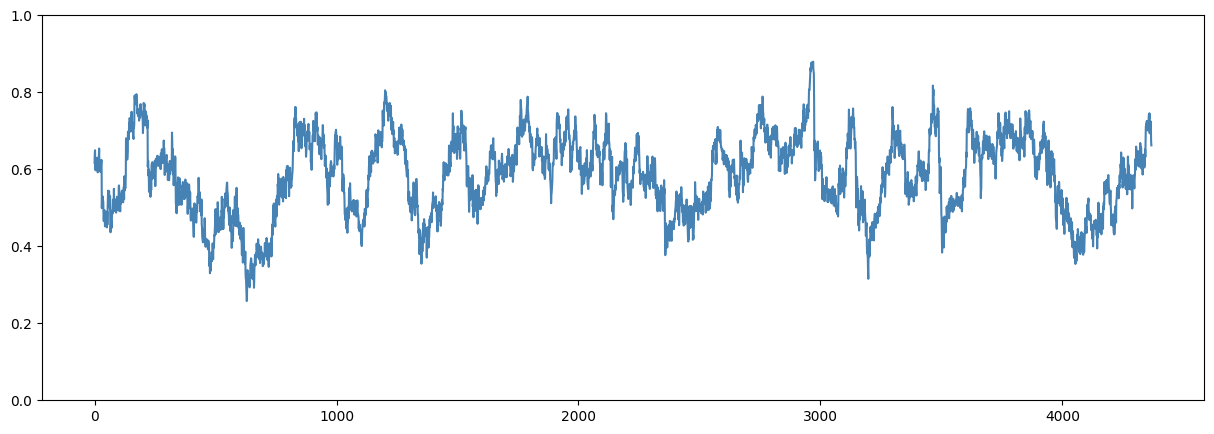

In [7]:
plt.figure(figsize=(15,5))
plt.plot(valuation_series, color="steelblue", label="valuation")
plt.ylim(0, 1)
plt.show()

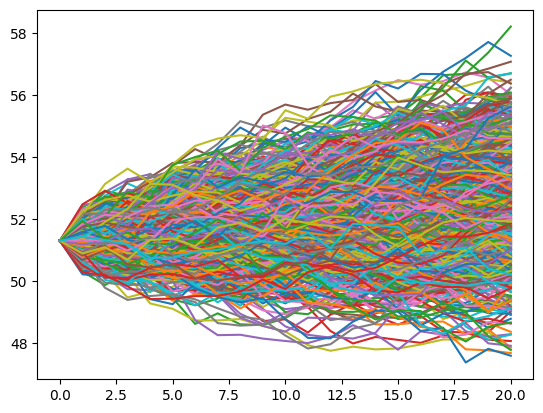

In [8]:
for path in recent_simulations:
    plt.plot(path)
plt.show()